📊 Original Degraded Image - Mean: 169.94, Std Dev: 45.35
📊 Final Restored Image - Mean: 162.21, Std Dev: 48.99


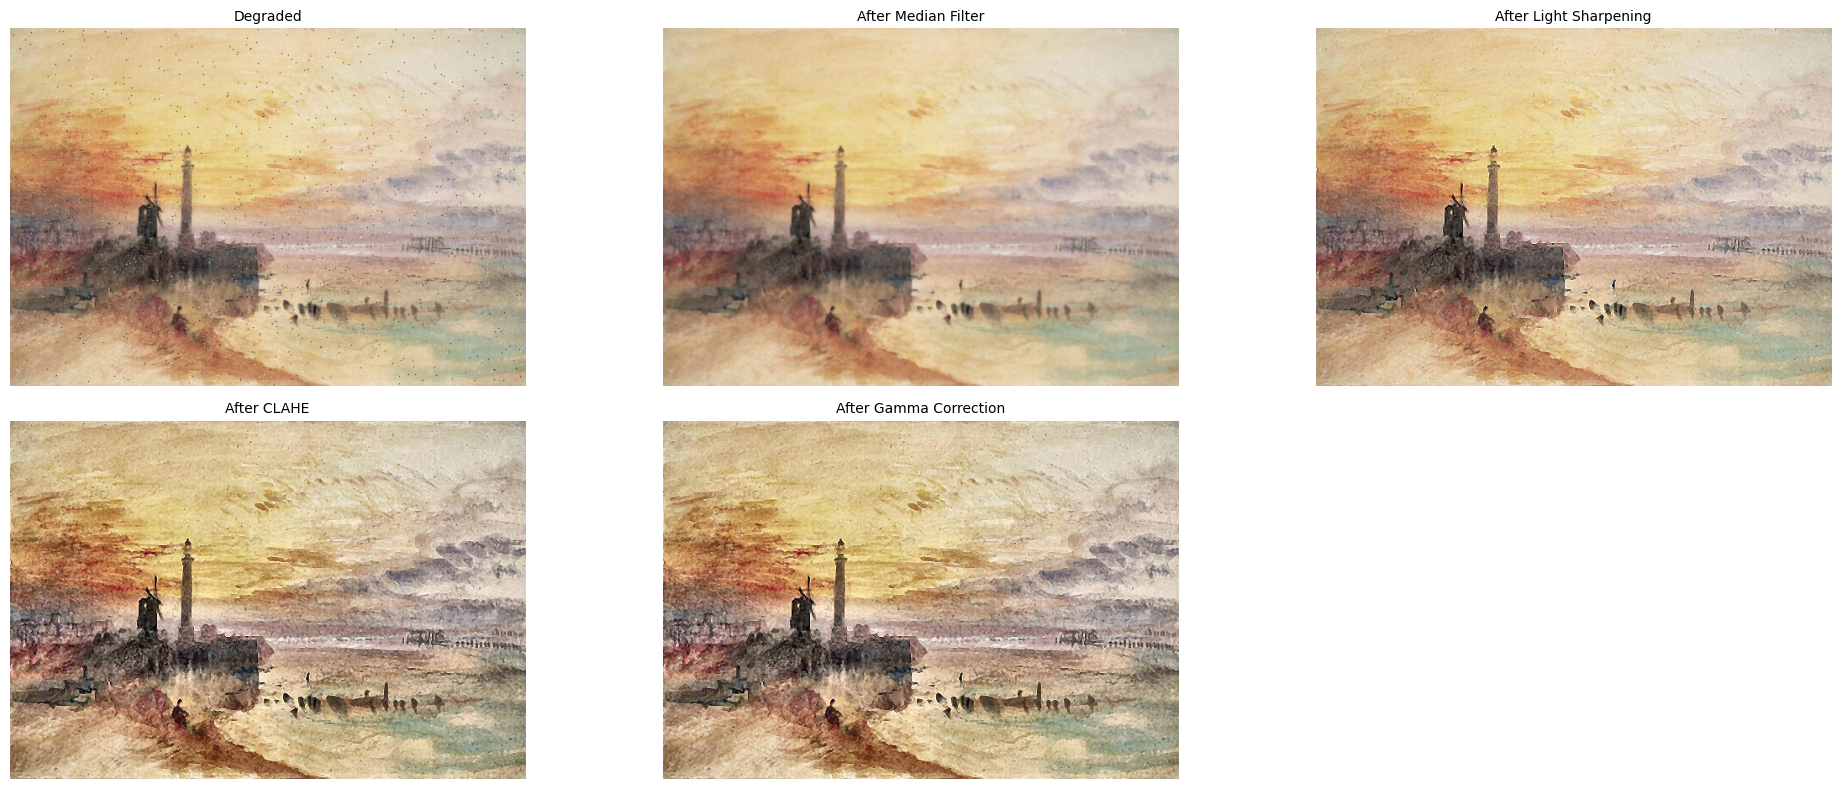

✅ Restoration complete. Image saved at: C:\Users\fatom\Downloads\IP_Dataset\example_restored_final.jpg
🕒 Total processing time: 1.18 seconds


In [1]:
# =========================================================
# Digital Image Processing Project: Natural Artwork Restoration
# =========================================================
# Optimized extended pipeline:
# - Remove salt and pepper noise
# - Apply light sharpening
# - Enhance contrast with CLAHE
# - Apply gamma correction
# - Save and show statistics
# =========================================================

# 0. Libraries
# =========================================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Helper Functions
# =========================================================

def remove_noise_median(image):
    """Remove salt and pepper noise using median filter."""
    return cv2.medianBlur(image, 3)

def light_sharpen(image):
    """Apply light sharpening to restore details."""
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def enhance_contrast_clahe(image):
    """Enhance contrast using CLAHE."""
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)

def gamma_correction(image, gamma=1.05):
    """Apply gamma correction."""
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

def summarize_pixel_values(image, title):
    """Print mean and standard deviation of pixel values."""
    mean_val = np.mean(image)
    std_val = np.std(image)
    print(f"📊 {title} - Mean: {mean_val:.2f}, Std Dev: {std_val:.2f}")

# 2. Restoration Pipeline
# =========================================================

def restore_artwork(degraded_path, restored_path):
    """Full extended restoration pipeline."""

    # Start timer
    start_time = time.time()

    img = cv2.imread(degraded_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Summarize original pixel values
    summarize_pixel_values(img, "Original Degraded Image")

    # Step 1: Median filter
    step1 = remove_noise_median(img)

    # Step 2: Light sharpening
    step2 = light_sharpen(step1)

    # Step 3: Contrast enhancement
    step3 = enhance_contrast_clahe(step2)

    # Step 4: Gamma correction
    final_result = gamma_correction(step3)

    # Summarize final restored pixel values
    summarize_pixel_values(final_result, "Final Restored Image")

    # Save output
    cv2.imwrite(restored_path, cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR))

    # Display step-by-step
    stages = [img, step1, step2, step3, final_result]
    titles = ['Degraded', 'After Median Filter', 'After Light Sharpening',
              'After CLAHE', 'After Gamma Correction']

    plt.figure(figsize=(20, 8))
    for idx, (stage, title) in enumerate(zip(stages, titles), 1):
        plt.subplot(2, 3, idx)
        plt.imshow(stage)
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # End timer
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"✅ Restoration complete. Image saved at: {restored_path}")
    print(f"🕒 Total processing time: {elapsed_time:.2f} seconds")

# 3. Example Run
# =========================================================

# Input/Output Paths
degraded_path = r"C:\Users\fatom\Downloads\IP_Dataset\example_degraded_light.jpg"
restored_path = r"C:\Users\fatom\Downloads\IP_Dataset\example_restored_final.jpg"

# Run restoration
restore_artwork(degraded_path, restored_path)
